In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
#loading the dataset
df_awal = pd.read_csv('jobs.csv')

In [5]:
# New DataFrame
data_updated = df_awal.drop(['Unnamed: 0', 'Job Experience Required','Role Category','Functional Area','Industry'], axis=1)


In [6]:
data_updated.to_csv('databaru.csv',index='False')

In [7]:
data_updated

,Job Salary,Key Skills,Job Title
0,Not Disclosed by Recruiter,Media Planning| Digital Media,Media Planning Executive/Manager
1,Not Disclosed by Recruiter,pre sales| closing| software knowledge| clien...,Sales Executive/Officer
2,Not Disclosed by Recruiter,Computer science| Fabrication| Quality check|...,R&D Executive
3,"2,00,000 - 4,00,000 PA.",Technical Support,Technical Support Engineer
4,Not Disclosed by Recruiter,manual testing| test engineering| test cases|...,Testing Engineer
...,...,...,...
27005,Not Disclosed by Recruiter,Graphics| C++| USB| Project management| SOC| ...,Software Developer
27006,Not Disclosed by Recruiter,Service delivery| LMS| CRE| Integration servi...,Operations Manager
27007,Not Disclosed by Recruiter,Counselor| Mentor| Trainer| Advisor| Teaching,Lecturer/Professor
27008,Not Disclosed by Recruiter,Security Analysis| Software Development Life ...,Software Developer


In [8]:
dtfix = data_updated.drop(['Job Salary'],axis=1)

In [9]:
dtfix.to_csv('datafix.csv',index=False)

In [10]:
df2 = pd.read_csv('datafix.csv')

In [11]:
df2

,Key Skills,Job Title
0,Media Planning| Digital Media,Media Planning Executive/Manager
1,pre sales| closing| software knowledge| clien...,Sales Executive/Officer
2,Computer science| Fabrication| Quality check|...,R&D Executive
3,Technical Support,Technical Support Engineer
4,manual testing| test engineering| test cases|...,Testing Engineer
...,...,...
27005,Graphics| C++| USB| Project management| SOC| ...,Software Developer
27006,Service delivery| LMS| CRE| Integration servi...,Operations Manager
27007,Counselor| Mentor| Trainer| Advisor| Teaching,Lecturer/Professor
27008,Security Analysis| Software Development Life ...,Software Developer


In [12]:
df2.isnull().sum()

,0
Key Skills,0
Job Title,0


In [13]:
df2.isna().sum()

,0
Key Skills,0
Job Title,0


In [14]:
duplicates = df2[df2.duplicated()]
print("Baris Duplikat:")
print(duplicates)

Baris Duplikat:
                                              Key Skills  \
186     Teaching| Educator| Counselor| Mentor| Traine...   
425        Counselor| Mentor| Trainer| Advisor| Teaching   
552     Teaching| Educator| Counselor| Mentor| Traine...   
684     marketing executive| distributors| customer p...   
732     Teaching| Educator| Counselor| Mentor| Traine...   
...                                                  ...   
26934                                           SAP ABAP   
26947   Help Desk| Customer Service| customer relatio...   
26977  SAP ABAP|Smartforms|Abap Objects|Adobe Forms|E...   
26995   Technical product configuration| design| inte...   
27007      Counselor| Mentor| Trainer| Advisor| Teaching   

                                Job Title  
186                    Lecturer/Professor  
425                       Physics Teacher  
552                    Lecturer/Professor  
684    Sales/Business Development Manager  
732                    Lecturer/Professor  

In [15]:
#duplicates
print(f"\nduplicates: {duplicates.shape[0]}")


duplicates: 1189


In [16]:
unique_data = df2[~df2.duplicated(keep=False)]


In [17]:
unique_data.shape[0]

25314

In [18]:
unique_data

,Key Skills,Job Title
0,Media Planning| Digital Media,Media Planning Executive/Manager
1,pre sales| closing| software knowledge| clien...,Sales Executive/Officer
2,Computer science| Fabrication| Quality check|...,R&D Executive
4,manual testing| test engineering| test cases|...,Testing Engineer
5,adobe experience manager| digital| digital ma...,System Analyst
...,...,...
27004,market research| customer profiling| sales ex...,Media Planning Executive/Manager
27005,Graphics| C++| USB| Project management| SOC| ...,Software Developer
27006,Service delivery| LMS| CRE| Integration servi...,Operations Manager
27008,Security Analysis| Software Development Life ...,Software Developer


In [19]:
unique_data.to_csv("dataclean.csv", index=False)

In [20]:
datanow = pd.read_csv("dataclean.csv")
datanow.head()

,Key Skills,Job Title
0,Media Planning| Digital Media,Media Planning Executive/Manager
1,pre sales| closing| software knowledge| clien...,Sales Executive/Officer
2,Computer science| Fabrication| Quality check|...,R&D Executive
3,manual testing| test engineering| test cases|...,Testing Engineer
4,adobe experience manager| digital| digital ma...,System Analyst


In [21]:
# Add ID Job
datanow['Job ID'] = range(1, len(datanow) + 1)

# Load dataset
datanow.to_csv('jobs_with_id.csv', index=False)

In [22]:
datanow

,Key Skills,Job Title,Job ID
0,Media Planning| Digital Media,Media Planning Executive/Manager,1
1,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,2
2,Computer science| Fabrication| Quality check|...,R&D Executive,3
3,manual testing| test engineering| test cases|...,Testing Engineer,4
4,adobe experience manager| digital| digital ma...,System Analyst,5
...,...,...,...
25309,market research| customer profiling| sales ex...,Media Planning Executive/Manager,25310
25310,Graphics| C++| USB| Project management| SOC| ...,Software Developer,25311
25311,Service delivery| LMS| CRE| Integration servi...,Operations Manager,25312
25312,Security Analysis| Software Development Life ...,Software Developer,25313


In [23]:
# Load data
data = pd.read_csv('jobs_with_id.csv')

In [24]:
# Remove"Job Title" with the length more than 3 words
Job_Data = data[data["Job Title"].str.split().str.len() <= 3]

# Result
Job_Data

Job_Data.to_csv("Job_Data.csv", index=False)


In [25]:
# Load data
data = pd.read_csv('Job_Data.csv')

In [26]:
# Encode Job Title to numeric
encoder = LabelEncoder()
data['Job Title Encoded'] = encoder.fit_transform(data['Job Title'])

In [27]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    tokenizer=lambda x: x.split('|'),
    stop_words='english',
    max_features=10000,  # Capturing more features
    min_df=1 # Remove very rare words
)
X = vectorizer.fit_transform(data['Key Skills']).toarray()

# Target variable
y = data['Job Title Encoded']

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [28]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Input

# Scaling (Optional if TF-IDF output is normalized)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define Model
model = Sequential()

# Input Layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Reduced dropout

# Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 475)               61275     
                                                                 
Total params: 2654427 (10.13 MB)
Trainable params: 2654427 (10.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,  # Smaller batch size for better gradient updates
    verbose=1
)


Epoch 1/20
601/601 [==============================] - 13s 6ms/step - loss: 4.6275 - accuracy: 0.2189 - val_loss: 3.6930 - val_accuracy: 0.3142
Epoch 2/20
601/601 [==============================] - 4s 6ms/step - loss: 3.4877 - accuracy: 0.3384 - val_loss: 3.3489 - val_accuracy: 0.3822
Epoch 3/20
601/601 [==============================] - 4s 6ms/step - loss: 2.9572 - accuracy: 0.4118 - val_loss: 3.1480 - val_accuracy: 0.4035
Epoch 4/20
601/601 [==============================] - 3s 5ms/step - loss: 2.5530 - accuracy: 0.4696 - val_loss: 3.0219 - val_accuracy: 0.4234
Epoch 5/20
601/601 [==============================] - 3s 5ms/step - loss: 2.2019 - accuracy: 0.5310 - val_loss: 2.9359 - val_accuracy: 0.4338
Epoch 6/20
601/601 [==============================] - 4s 7ms/step - loss: 1.9091 - accuracy: 0.5863 - val_loss: 2.8978 - val_accuracy: 0.4397
Epoch 7/20
601/601 [==============================] - 3s 5ms/step - loss: 1.6524 - accuracy: 0.6354 - val_loss: 2.8811 - val_accuracy: 0.4453
Epoch

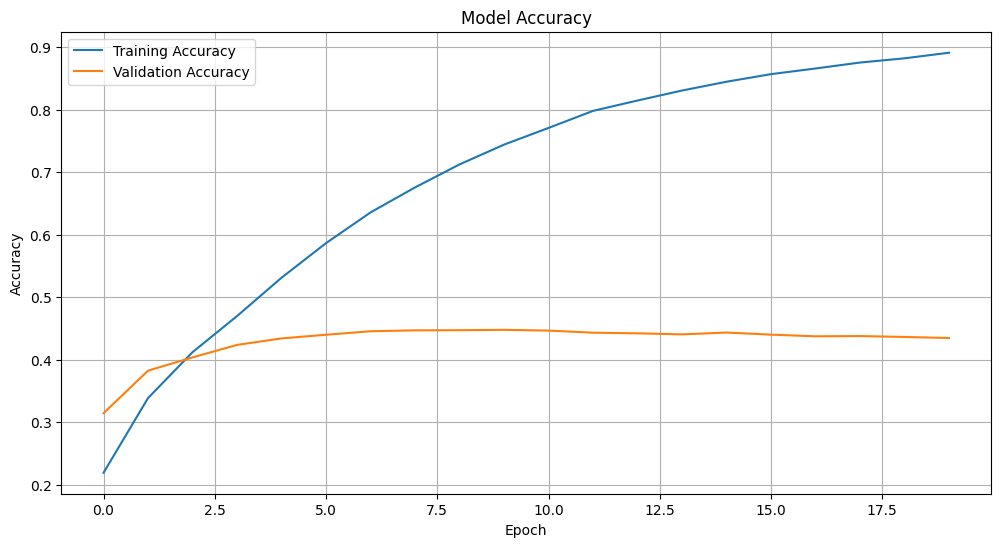

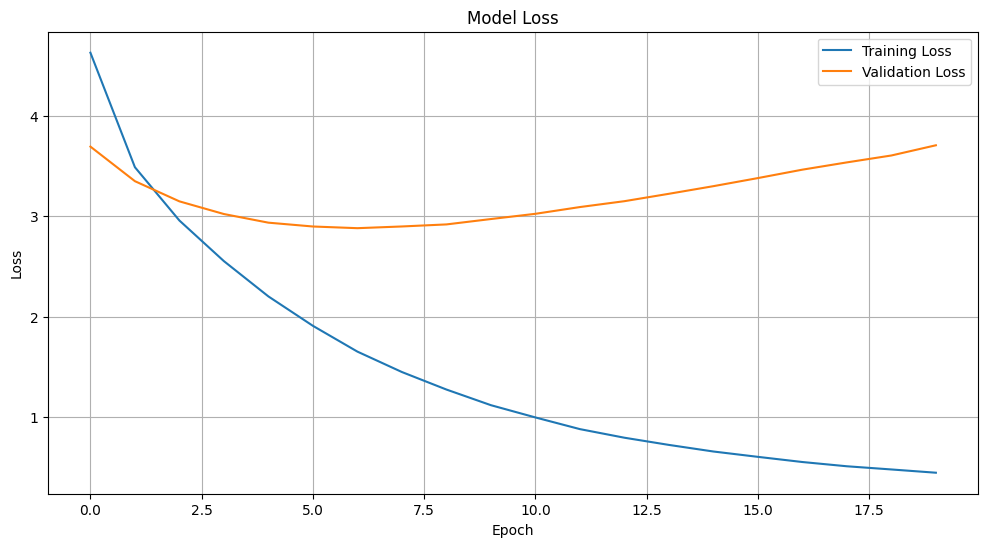

In [30]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [31]:
#prediction sample
def recommend_jobs(user_skills, model, vectorizer, encoder, top_n=5):
    #change skills into vektor TF-IDF
    user_vector = vectorizer.transform([user_skills]).toarray()

    #model predict
    predictions = model.predict(user_vector)

    #top probabilities jobs
    top_indices = predictions.argsort()[0][-top_n:][::-1]

    # job titles based on prediction index
    recommended_jobs = encoder.inverse_transform(top_indices)
    return recommended_jobs

#input
inputx = "XML| Javascript| JDBC| Struts| JSON| HTML"
recommended_jobs = recommend_jobs(inputx, model, vectorizer, encoder)
print("Rekomendasi Pekerjaan:", recommended_jobs)



1/1 [==============================] - 0s 102ms/step
Rekomendasi Pekerjaan: ['Software Developer' 'Technical Architect' 'Team Lead/Technical Lead'
 'Trainer/Faculty' 'IT/Technical Content Developer']


In [32]:
model.save('model.h5')
print("Model saved as 'model.h5'")

Model saved as 'model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
!pip install tensorflow==2.15.0
!pip install tensorflow_decision_forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [33]:
!tensorflowjs_converter --input_format keras model.h5 ./exportedmodel


2024-12-12 07:04:15.380930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 07:04:15.380990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 07:04:15.382305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 07:04:16.462524: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [34]:
import os
import zipfile

#folder and zip file
folder_name = "exportedmodel"
zip_file_name = "converted_model.zip"

# make zip file
with zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_name):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_name)
            zipf.write(file_path, arcname)

# success message
print(f"{zip_file_name} berhasil dibuat.")

converted_model.zip berhasil dibuat.


In [35]:
import json

# Convert the int64 values to int
vectorizer_dict = {
    "vocabulary": {key: int(value) for key, value in vectorizer.vocabulary_.items()},
    "idf": vectorizer.idf_.tolist()  # This converts the numpy array to a list
}

#file JSON
with open('vectorizer.json', 'w') as f:
    json.dump(vectorizer_dict, f)



In [36]:
#LabelEncoder to file JSON
encoder_dict = {
    "classes": encoder.classes_.tolist()
}

with open('encoder.json', 'w') as f:
    json.dump(encoder_dict, f)


In [1]:
# Install TensorFlow.js
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin